In [2]:
# Imports

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# KMeans Clustering

## Generating Data

In [3]:
# Variables

n_data = 1000
seed = 1
n_clusters = 4

### Generating Blob Data

In [4]:
# Generate random Gaussian blobs

blobs, blob_labels = make_blobs(
  n_samples=n_data,     # Number of data points
  n_features=2,         # Number of features
  centers=n_clusters,   # Number of clusters (labels)
  random_state=seed, 
)

In [14]:
# Labels

print(f"Labels: {set(blob_labels)}")
print(f"Number of Labels: {len(set(blob_labels))}")

Labels: {0, 1, 2, 3}
Number of Labels: 4


In [15]:
# Quick view of first 5 data points

np.hstack([blobs[0:5], blob_labels[0:5].reshape(-1,1)])

array([[-10.45765533,  -3.30899488,   1.        ],
       [ -5.90962043,  -7.80717036,   2.        ],
       [ -1.00497975,   4.35530142,   0.        ],
       [ -6.63784922,  -4.52085249,   3.        ],
       [ -6.3466658 ,  -8.89940182,   2.        ]])

### Generating Uniform Data

In [16]:
# Generate data uniformly

uniform = np.random.rand(
  n_data,         # Number of observations
  2,              # Number of columns
)

In [18]:
# Viewing the data

np.hstack([uniform[0:5], blob_labels[0:5].reshape(-1,1)])

array([[0.36899204, 0.39596318, 1.        ],
       [0.87971634, 0.94214962, 2.        ],
       [0.58203202, 0.46044639, 0.        ],
       [0.8282285 , 0.43020399, 3.        ],
       [0.14358972, 0.89316872, 2.        ]])

## Applying KMeans

### Applying KMeans to Blob Data

In [5]:
# Creating the KMeans object
gaussian_kmeans = KMeans(
  n_clusters=n_clusters,
  random_state=seed,
)

# Fitting the KMeans to the data
clusters_blob = gaussian_kmeans.fit_predict(blobs)

### Applying KMeans to Unifrom Data

In [19]:
# Creating the KMeans object
uniform_kmeans = KMeans(
  n_clusters=n_clusters,
  random_state=seed,
)

# Fitting the KMeans to the data
clusters_uniform = uniform_kmeans.fit_predict(uniform)

## Plotting the Data

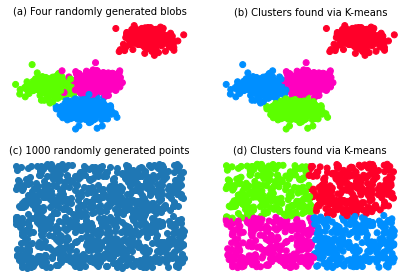

In [24]:
# Creating the figure
fig = plt.figure()

# Creating the first graph with blob data and true labels
plt.subplot(2,2,1)
plt.scatter(
  blobs[:,0], # First column of the blobs
  blobs[:,1], # Second column of blobs
  c=blob_labels, # Color it by label
  cmap='gist_rainbow'
)
plt.title("(a) Four randomly generated blobs", fontsize=10)
plt.axis("off")

# Creating the second graph with blob data and KMeans labels
plt.subplot(222)
plt.scatter(
  blobs[:, 0], 
  blobs[:, 1], 
  c=clusters_blob, 
  cmap='gist_rainbow'
)
plt.title("(b) Clusters found via K-means", fontsize=10)
plt.axis("off")

# Creating the third graph of uniform data
plt.subplot(223)
plt.scatter(uniform[:, 0], uniform[:, 1])
plt.title("(c) 1000 randomly generated points", fontsize=10)
plt.axis("off")

# Creating the fourth graph of uniform data and KMeans label
plt.subplot(224)
plt.scatter(uniform[:, 0], uniform[:, 1], c=clusters_uniform, cmap='gist_rainbow')
plt.title("(d) Clusters found via K-means", fontsize=10)
plt.axis("off")

plt.tight_layout()
plt.show()

# Swiss Roll

In [25]:
# Imports

from mpl_toolkits.mplot3d import Axes3D
from sklearn import manifold, datasets

## Generating Swiss Roll Data

In [27]:
X, color = datasets.make_swiss_roll(n_samples=1500)

## Applying KMeans

In [28]:
clusters_swiss_roll = KMeans(n_clusters=100, random_state=seed).fit_predict(X)

## Plotting Swiss Roll with KMeans Clusters

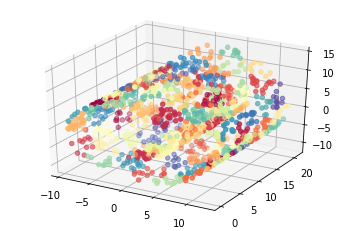

In [29]:
fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=clusters_swiss_roll, cmap='Spectral');